### RGB Task

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar100

# 클래스 이름 지정
CLASS_NAMES = sorted(['beaver', 'dolphin', 'otter', 'seal', 'whale',  # aquatic mammals
                           'aquarium' 'fish', 'flatfish', 'ray', 'shark', 'trout',  # fish
                           'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', # flowers
                           'bottles', 'bowls', 'cans', 'cups', 'plates', # food containers
                           'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', # fruit and vegetables
                           'clock', 'keyboard', 'lamp', 'telephone', 'television', # household electrical devices
                           'bed', 'chair', 'couch', 'table', 'wardrobe', # household furniture
                           'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', # insects
                           'bear', 'leopard', 'lion', 'tiger', 'wolf', # large carnivores
                           'bridge', 'castle', 'house', 'road', 'skyscraper', # large man-made outdoor things
                           'cloud', 'forest', 'mountain', 'plain', 'sea', # large natural outdoor scenes
                           'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', # large omnivores and herbivores
                           'fox', 'porcupine', 'possum', 'raccoon', 'skunk', # medium-sized mammals
                           'crab', 'lobster', 'snail', 'spider', 'worm', # non-insect invertebrates
                           'baby', 'boy', 'girl', 'man', 'woman', # people
                           'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', # reptiles
                           'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', # small mammals
                           'maple', 'oak', 'palm', 'pine', 'willow', # trees
                           'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', # vehicles 1
                           'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor' # vehicles 2
                          ])

# tensorflow 라이브러리에 내장되어 있는 데이터 세트 호출 후 데이터 세트 분리
(train_images, train_targets), (test_images, test_targets) = cifar100.load_data()

# 타겟의 고유의 값 확인
print(np.unique(test_targets))
# 데이터 형태 확인
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


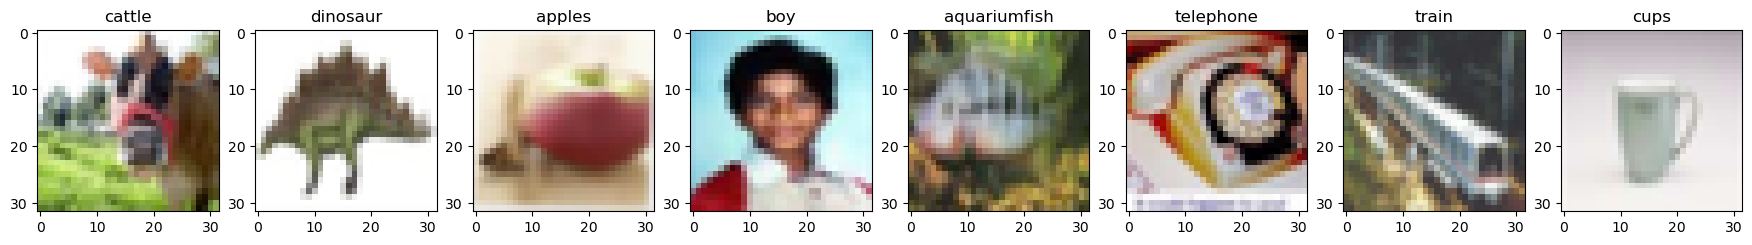

In [2]:
import matplotlib.pyplot as plt

# 이미지와 타겟(이름)을 보여주는 함수 선언
def show_images(images, targets, ncols=8):
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axes[i].imshow(images[i])
        target = targets[i].squeeze()
        axes[i].set_title(CLASS_NAMES[int(target)])

# 함수를 사용하여 이미지 출력 8번째까지 출력
show_images(train_images[:8], train_targets[:8])

In [3]:
import numpy as np

# 전처리 함수 선언
def get_preprocessed_data(images, targets):
    # 픽셀 범위를 0 또는 1로 이미지 정규화 후 형변환
    images = np.array(images / 255.0, dtype=np.float32)
    # 타겟 데이터 형변환
    targets = np.array(targets, dtype=np.float32)

    return images, targets

In [4]:
# 함수를 통해 형변환 진행
train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

In [5]:
train_images[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7647059 , 0.8039216 , 0.75686276],
        [0.83137256, 0.8784314 , 0.8       ],
        [0.7137255 , 0.7607843 , 0.654902  ]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.6666667 , 0.6901961 , 0.5882353 ],
        [0.6313726 , 0.65882355, 0.50980395],
        [0.57254905, 0.6039216 , 0.44313726]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7411765 , 0.78039217, 0.6627451 ],
        [0.6509804 , 0.69803923, 0.50980395],
        [0.4745098 , 0.52156866, 0.34117648]],

       ...,

       [[0.5803922 , 0.7254902 , 0.30980393],
        [0.5568628 , 0.7137255 , 0.22352941],
        [0.54901963, 0

In [6]:
# 데이터 형태 확인
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [7]:
# 차원이 1인 축을 제거하여 타겟 배열을 평평하게 만듦
train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

In [8]:
# 데이터 형태 확인
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [9]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

# 입력 데이터 크기 지정
IMAGE_SIZE = 32

# Input layer
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolutional Layer
x = Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

# Flatten Layer: 2D 텐서를 1D로 평탄화
x = Flatten(name='classifierA00')(x)
x = Dropout(rate=0.5, name='classifierA-Dropout01')(x)

# Dense Layer (은닉층)
x = Dense(64, activation='relu', name='classifierAD01')(x)
x = Dropout(rate=0.5, name='classifierA-Dropout02')(x)

# Dense Layer (출력층)
output = Dense(100, activation='softmax', name='output')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA-Dropout01 (Dropout)      │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA-Dropout02 (Dropout)      │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,532 (2.07 MB)

 Trainable params: 542,532 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [11]:
# 훈련
history = model.fit(x=train_images, y=train_targets, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - acc: 0.0207 - loss: 4.5270 - val_acc: 0.0864 - val_loss: 4.0226
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - acc: 0.0686 - loss: 4.1047 - val_acc: 0.1376 - val_loss: 3.7293
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - acc: 0.0991 - loss: 3.8722 - val_acc: 0.1773 - val_loss: 3.5391
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - acc: 0.1186 - loss: 3.7471 - val_acc: 0.1923 - val_loss: 3.4677
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - acc: 0.1276 - loss: 3.6701 - val_acc: 0.2036 - val_loss: 3.3896


In [12]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

# 입력 데이터 크기 지정
IMAGE_SIZE = 32

# Input layer
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolutional Layer 1
x = Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

# Convolutional Layer 2
x = Conv2D(filters=64, kernel_size=5, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

# Flatten Layer: 2D 텐서를 1D로 평탄화
x = Flatten(name='classifierA00')(x)
x = Dropout(rate=0.5, name='classifierA-Dropout01')(x)

# Dense Layer (은닉층)
x = Dense(64, activation='relu', name='classifierAD01')(x)
x = Dropout(rate=0.5, name='classifierA-Dropout02')(x)

# Dense Layer (출력층)
output = Dense(100, activation='softmax', name='output')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA-Dropout01 (Dropout)      │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 64)                  │       1,048,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA-Dropout02 (Dropout)      │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,096,932 (4.18 MB)

 Trainable params: 1,096,932 (4.18 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [14]:
# 훈련
history = model.fit(x=train_images, y=train_targets, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 98ms/step - acc: 0.0197 - loss: 4.5398 - val_acc: 0.0587 - val_loss: 4.1965
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 97ms/step - acc: 0.0468 - loss: 4.2476 - val_acc: 0.1165 - val_loss: 3.9187
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - acc: 0.0697 - loss: 4.0535 - val_acc: 0.1445 - val_loss: 3.7617
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - acc: 0.0865 - loss: 3.9136 - val_acc: 0.1649 - val_loss: 3.6293
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - acc: 0.0954 - loss: 3.8471 - val_acc: 0.1757 - val_loss: 3.5520


In [15]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

# 입력 데이터 크기 지정
IMAGE_SIZE = 32

# Input layer
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolutional Layer 1
x = Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

# Convolutional Layer 2
x = Conv2D(filters=64, kernel_size=5, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

# Convolutional Layer 3
x = Conv2D(filters=128, kernel_size=5, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

# Flatten Layer: 2D 텐서를 1D로 평탄화
x = Flatten(name='classifierA00')(x)

# Dense Layer (은닉층)
x = Dense(64, activation='relu', name='classifierAD01')(x)
x = Dropout(rate=0.5, name='classifierA-Dropout01')(x)

# Dense Layer (출력층)
output = Dense(100, activation='softmax', name='output')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 128)         │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA-Dropout01 (Dropout)      │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,261,028 (8.63 MB)

 Trainable params: 2,261,028 (8.63 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [17]:
# 훈련
history = model.fit(x=train_images, y=train_targets, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 231ms/step - acc: 0.0207 - loss: 4.5227 - val_acc: 0.0903 - val_loss: 4.0651
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 234ms/step - acc: 0.0625 - loss: 4.1288 - val_acc: 0.1388 - val_loss: 3.7737
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 228ms/step - acc: 0.0944 - loss: 3.8956 - val_acc: 0.1719 - val_loss: 3.5888
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 231ms/step - acc: 0.1121 - loss: 3.7741 - val_acc: 0.1863 - val_loss: 3.4918
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 76s 244ms/step - acc: 0.1272 - loss: 3.6834 - val_acc: 0.2077 - val_loss: 3.3857


In [18]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

# 입력 데이터 크기 지정
IMAGE_SIZE = 32

# Input layer
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolutional Layer 1
x = Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(x)

# Convolutional Layer 2
x = Conv2D(filters=64, kernel_size=4, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=4, strides=1, padding='same', activation='relu')(x)

# Convolutional Layer 3
x = Conv2D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

# Flatten Layer: 2D 텐서를 1D로 평탄화
x = Flatten(name='classifierA00')(x)

# Dense Layer (은닉층)
x = Dense(64, activation='relu', name='classifierAD01')(x)
x = Dropout(rate=0.5, name='classifierA-Dropout01')(x)

# Dense Layer (출력층)
output = Dense(100, activation='softmax', name='output')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA-Dropout01 (Dropout)      │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 288,804 (1.10 MB)

 Trainable params: 288,804 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [20]:
# 훈련
history = model.fit(x=train_images, y=train_targets, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - acc: 0.0201 - loss: 4.5325 - val_acc: 0.0841 - val_loss: 4.0954
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - acc: 0.0629 - loss: 4.1335 - val_acc: 0.1415 - val_loss: 3.7314
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - acc: 0.0961 - loss: 3.8955 - val_acc: 0.1704 - val_loss: 3.5588
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - acc: 0.1139 - loss: 3.7648 - val_acc: 0.1933 - val_loss: 3.4432
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - acc: 0.1280 - loss: 3.6666 - val_acc: 0.1982 - val_loss: 3.3898


In [21]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

# 입력 데이터 크기 지정
IMAGE_SIZE = 32

# Input layer
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolutional Layer 1
x = Conv2D(filters=128, kernel_size=4, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=128, kernel_size=4, strides=1, padding='same', activation='relu')(x)

# Convolutional Layer 2
x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

# Flatten Layer: 2D 텐서를 1D로 평탄화
x = Flatten(name='classifierA00')(x)

# Dense Layer (은닉층)
x = Dense(128, activation='relu', name='classifierAD01')(x)
x = Dense(256, activation='relu', name='classifierAD02')(x)

# Dense Layer (출력층)
output = Dense(100, activation='softmax', name='output')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD02 (Dense)               │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,180,388 (4.50 MB)

 Trainable params: 1,180,388 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [23]:
# 훈련
history = model.fit(x=train_images, y=train_targets, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - acc: 0.0422 - loss: 4.3188 - val_acc: 0.1464 - val_loss: 3.6087
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 85ms/step - acc: 0.1662 - loss: 3.4737 - val_acc: 0.1997 - val_loss: 3.2877
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - acc: 0.2319 - loss: 3.1068 - val_acc: 0.2546 - val_loss: 3.0258
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - acc: 0.2826 - loss: 2.8515 - val_acc: 0.2847 - val_loss: 2.8793
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - acc: 0.3230 - loss: 2.6552 - val_acc: 0.3071 - val_loss: 2.7910


In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# 입력 데이터 크기 지정
INPUT_SIZE = 32

# Input layer
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 3))

# Convolutional Layer 1
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Convolutional Layer 2
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# Convolutional Layer 3
x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Convolutional Layer 4
x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# Convolutional Layer 5
x = Conv2D(filters=256, kernel_size=3, padding='same',  kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Convolutional Layer 6
x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# 각 채널의 모든 값의 평균을 계산하여 하나의 값으로 축소
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
# Dense Layer (은닉층)
x = Dense(300, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
# Dense Layer (출력층)
output = Dense(100, activation='softmax', kernel_initializer='glorot_normal')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 8, 8, 256)           │         590,0

 Total params: 1,256,192 (4.79 MB)

 Trainable params: 1,254,400 (4.79 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

# 훈련
history = model.fit(x=train_images, y=train_targets, validation_split=0.2, batch_size=32, epochs=5, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 195s 154ms/step - acc: 0.0401 - loss: 4.4459 - val_acc: 0.0701 - val_loss: 4.2637 - learning_rate: 0.0010
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 182s 145ms/step - acc: 0.1072 - loss: 3.7189 - val_acc: 0.1365 - val_loss: 3.5312 - learning_rate: 0.0010
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 193s 155ms/step - acc: 0.1762 - loss: 3.2923 - val_acc: 0.2149 - val_loss: 3.0796 - learning_rate: 0.0010
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 188s 150ms/step - acc: 0.2257 - loss: 2.9940 - val_acc: 0.2476 - val_loss: 2.9188 - learning_rate: 0.0010
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 187s 150ms/step - acc: 0.2752 - loss: 2.7564 - val_acc: 0.3201 - val_loss: 2.5619 - learning_rate: 0.0010


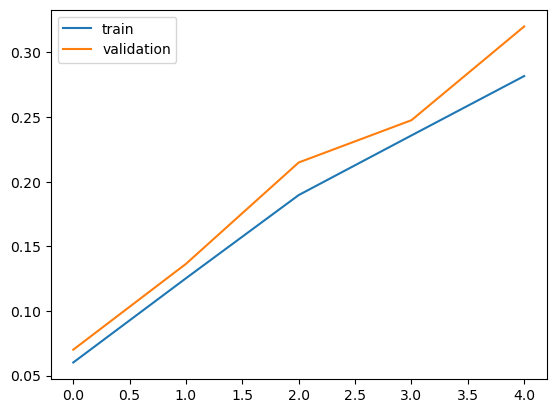

In [27]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [28]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - acc: 0.3254 - loss: 2.5517


[2.54110050201416, 0.32280001044273376]

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l1, l2

# 입력 데이터 크기 지정
INPUT_SIZE = 32

# Input layer
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 3))

# Convolutional Layer 1
# alpha를 크게 할 수록 Weight값을 작게 만들어서 과적합을 개선할 수 있고
# alpha를 작게 할 수록 Weight의 값이 커지지만, 어느 정도 상쇄하므로 과소적합을 개선할 수 있다.
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# Convolutional Layer 2
x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# Convolutional Layer 2
x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# 각 채널의 모든 값의 평균을 계산하여 하나의 값으로 축소
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
# Dense Layer (은닉층)
x = Dense(300, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
# Dense Layer (출력층)
output = Dense(100, activation='softmax', kernel_initializer='glorot_normal')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 8, 8, 256)           │         590,0

 Total params: 1,256,192 (4.79 MB)

 Trainable params: 1,254,400 (4.79 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

# 훈련
history = model.fit(x=train_images, y=train_targets, validation_split=0.2, batch_size=32, epochs=5, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 191s 150ms/step - acc: 0.0384 - loss: 4.5133 - val_acc: 0.0672 - val_loss: 4.1216 - learning_rate: 0.0010
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 184s 147ms/step - acc: 0.1135 - loss: 3.7381 - val_acc: 0.1591 - val_loss: 3.4801 - learning_rate: 0.0010
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 187s 150ms/step - acc: 0.1787 - loss: 3.2869 - val_acc: 0.1955 - val_loss: 3.3365 - learning_rate: 0.0010
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 193s 154ms/step - acc: 0.2340 - loss: 3.0061 - val_acc: 0.2390 - val_loss: 3.0116 - learning_rate: 0.0010
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 207s 166ms/step - acc: 0.2843 - loss: 2.7713 - val_acc: 0.3201 - val_loss: 2.6807 - learning_rate: 0.0010


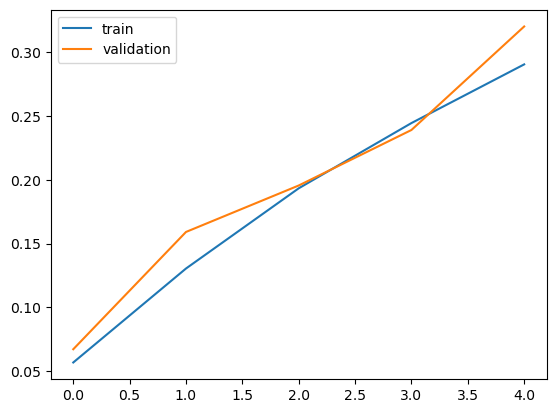

In [32]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [33]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - acc: 0.3218 - loss: 2.6699


[2.658025026321411, 0.31619998812675476]